In [ ]:
import os
print(os.getcwd())

In [1]:
import torch

In [2]:
x = torch.rand(5,3)
print(x)

tensor([[0.8591, 0.6600, 0.3112],
        [0.4115, 0.8064, 0.1342],
        [0.7251, 0.7607, 0.5938],
        [0.5124, 0.2411, 0.6075],
        [0.3059, 0.7953, 0.8313]])


In [3]:
torch.cuda.is_available()

True

In [62]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import random
from PIL import ImageFont, ImageDraw, Image

In [63]:
# EasyOCR reader 생성
reader = easyocr.Reader(['ko', 'en'], gpu=True)

In [83]:
# OCR 결과 얻기
result = reader.readtext('images/39.jpg',detail = 1, paragraph=True)

In [84]:
# 이미지 읽기
img = cv2.imread('images/39.jpg')

In [85]:
img = Image.fromarray(img)
font = ImageFont.truetype("fonts/HMKMRHD.TTF",20)
draw = ImageDraw.Draw(img)

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")


for i in result :
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]
    
    color_idx = random.randint(0,254)
    color = [int(c) for c in COLORS[color_idx]]
    
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)

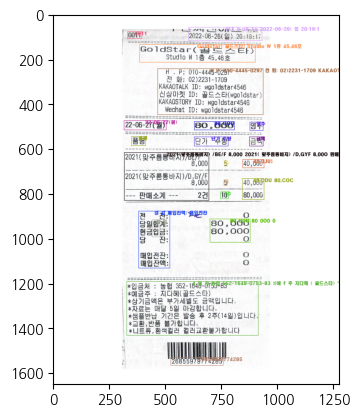

In [86]:
# 이미지 보기
plt.imshow(img)
plt.show()

In [89]:
txts = [line[1] for line in result] ##텍스트만 가져오기
print(txts)

['411 5 uII To 2022-06-26( 일 20:19:1', '0011', 'Goldstar( 골드스타) Studio W 1층 45,46호', 'H P; 010-4445-0297 전 화: 02)2231-1709 KAKAOTALK ID; Wgoldstar4546 신상마켓 ID:  골드스타(Wgoldstar) KAKAOSTORY ID: wgoldstar4546 Iechat  ID: Wgoldstar4546', '22-06-27(월)', '80 OOO', '영수', '품명', '단가 수량', '금액', '2021(맞주름통바지) /BE/F 8,000 2021( 맞주름통바지) /D,GYF 8,00O 판매소계 2건', '5', '40,0JU}', '5', '40,ODU 80,COC', '10', '합 입', '80 O0O 80 0O0 0', '결 값 매입잔액: 매입전잔', '4 입 처 농협 552-1648-0753-83 #예 f 주 지다혜 ( 골드스타) *상기금액은 부가세별도 금액입니다 . *자료는 매달 5일 마감합니다 . * 풀반남   기간은 발송 후 2주(14일) 입니다, *싶출반호] 기 l합발심 *니트류 , 흰색컬러   컬러교환불가합니다', "'26855979774285"]
